#HDS 5210 - 2024 - Final Project

###Project Description
As a COVID-19 data analysis project, its main aim is to explore and forecast the scenarios of the development of the COVID-19 pandemic around the world using machine learning tools. The project utilizes two complementary datasets: extensive country statistics, in the form of one article from the Worldometer website and another with temporal COVID-19 data breakdown. The pipeline that applies data transformations, joins, aggregations, and classification and regression models provides useful knowledge of pandemic trends and consequences.

The technical implementation follows a structured approach with five key data transformations: predicting the death toll, testing, recovery, this graphics comparing cases of the disease to other diseases across the continuum, and the pouring of the testing coverage logarithmically. The project performs three distinct types of aggregations: ; a continental review that outlines overall effects across the continent, an assembly of the ten worst affected countries based on mortality rate, and a population-size based review that shows the effects of the pandemic on countries of varying population size. These analyses are visualized through three main plots: Continental case distribution bar chart, testing rate vs mortality rate-continental map and bar chart of; countries with highest mortality rates. The visualization suite is valuable in both presenting the overall trends and fine details regarding COVID-19’s influence on the world.

It finishes with application of successfully developed machine learning models based on Random Forest algorithms in classification and regression projects. Regression model forecasts mortality rates depending on several COVID-19 indicators, and classification model sorts countries by risk level. Such models offer policy decision-makers and health care executives and managers beneficial recommendations relevant to a country or regional organizational management for pandemic relief efforts. The research demonstrates the steaky inequalities in the testing, fatality, and handling of Covid-19 between multiple regions/issues and population points. The conclusion drawn in the project and the findings of the testing rate on mortality outcomes are instructional for future management of public health crises. The described methodology can be used as a model for analyzing the same and/or other health emergencies to support further improved strategies for managing the indicated health risks.

##Dataset 1 -
The first data source is “worldometer_coronavirus_summary_data.xlsx” OVERVIEW of COVID-19 cases for 226 countries, by continent.t. They consist of such basic parameters as total cases, deaths, recoveries, active cases, and critical cases. This data set also contains other variables as cases and deaths per million individuals, test data, and population totals. This structured dataset is most useful in comparison of the relative viral threat worldwide where the raw numbers of infected individuals and deaths are provided, along with the number of cases and deaths scaled by population to allow for comparison between countries of vastly different population densities and sizes.

Link: https://www.kaggle.com/datasets/josephassaker/covid19-global-dataset

##Dataset 2 -  
The second dataset from “covid_data.csv ”has better temporal analysis of COVID-19 over 238 countries. Like the case and death figures, it provides the number of new cases and deaths along with the total totals so it is helpful in understanding the pattern of covid 19 pandemic. There is further breakdown of the presently active cases, the critically ill, the discharged, and much more, as well as per-million-population data. However, this set of features is not supported with any timestamp – which differentiates from our dataset and is highly beneficial forthe analysis of the pandemic cycle and how different regions went through various waves of the virus. The only difference is the number of countries in this dataset: 238, against 226 in the first; which may imply that this dataset contains some territories or regions that are classified differently from the first one.

Link: https://www.kaggle.com/datasets/saunakghosh/covid-dataset-latest

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

src_1= pd.read_excel("/content/worldometer_coronavirus_summary_data.xlsx")
src_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         226 non-null    object 
 1   continent                       226 non-null    object 
 2   total_confirmed                 226 non-null    int64  
 3   total_deaths                    218 non-null    float64
 4   total_recovered                 204 non-null    float64
 5   active_cases                    204 non-null    float64
 6   serious_or_critical             145 non-null    float64
 7   total_cases_per_1m_population   226 non-null    int64  
 8   total_deaths_per_1m_population  218 non-null    float64
 9   total_tests                     212 non-null    float64
 10  total_tests_per_1m_population   212 non-null    float64
 11  population                      226 non-null    int64  
dtypes: float64(7), int64(3), object(2)
m

In [27]:
src_2 = pd.read_csv("/content/covid_data.csv")
src_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Continent        236 non-null    object 
 1   Country          238 non-null    object 
 2   Population       229 non-null    float64
 3   Cases.New        111 non-null    float64
 4   Cases.Active     218 non-null    float64
 5   Cases.Critical   130 non-null    float64
 6   Cases.Recovered  216 non-null    float64
 7   Cases.1M_pop     230 non-null    float64
 8   Cases.Total      238 non-null    int64  
 9   Deaths.New       35 non-null     float64
 10  Deaths.1M_pop    225 non-null    float64
 11  Deaths.Total     233 non-null    float64
 12  Tests.1M_pop     213 non-null    float64
 13  Tests.Total      213 non-null    float64
 14  Day              238 non-null    object 
 15  Time             238 non-null    object 
dtypes: float64(11), int64(1), object(4)
memory usage: 29.9+ KB
<cl

In [28]:
src_1.head()

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Afghanistan,Asia,179267,7690.0,162202.0,9375.0,1124.0,4420,190.0,951337.0,23455.0,40560636
1,Albania,Europe,275574,3497.0,271826.0,251.0,2.0,95954,1218.0,1817530.0,632857.0,2871945
2,Algeria,Africa,265816,6875.0,178371.0,80570.0,6.0,5865,152.0,230861.0,5093.0,45325517
3,Andorra,Europe,42156,153.0,41021.0,982.0,14.0,543983,1974.0,249838.0,3223924.0,77495
4,Angola,Africa,99194,1900.0,97149.0,145.0,NaN,2853,55.0,1499795.0,43136.0,34769277


,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Afghanistan,Asia,179267,7690.0,162202.0,9375.0,1124.0,4420,190.0,951337.0,23455.0,40560636
1,Albania,Europe,275574,3497.0,271826.0,251.0,2.0,95954,1218.0,1817530.0,632857.0,2871945
2,Algeria,Africa,265816,6875.0,178371.0,80570.0,6.0,5865,152.0,230861.0,5093.0,45325517
3,Andorra,Europe,42156,153.0,41021.0,982.0,14.0,543983,1974.0,249838.0,3223924.0,77495
4,Angola,Africa,99194,1900.0,97149.0,145.0,NaN,2853,55.0,1499795.0,43136.0,34769277


In [29]:
src_2.head()

,Continent,Country,Population,Cases.New,Cases.Active,Cases.Critical,Cases.Recovered,Cases.1M_pop,Cases.Total,Deaths.New,Deaths.1M_pop,Deaths.Total,Tests.1M_pop,Tests.Total,Day,Time
0,North-America,Anguilla,15230.0,NaN,13.0,4.0,3879.0,256336.0,3904,NaN,788.0,12.0,3373736.0,51382.0,2023-07-07,2023-07-07T17:30:09+00:00
1,North-America,Saint-Pierre-Miquelon,5759.0,NaN,1001.0,1.0,2449.0,599410.0,3452,NaN,347.0,2.0,4410488.0,25400.0,2023-07-07,2023-07-07T17:30:09+00:00
2,Africa,Saint-Helena,6115.0,NaN,2164.0,NaN,2.0,354211.0,2166,NaN,NaN,NaN,NaN,NaN,2023-07-07,2023-07-07T17:30:09+00:00
3,South-America,Falkland-Islands,3539.0,NaN,0.0,NaN,1930.0,545352.0,1930,NaN,NaN,NaN,2439107.0,8632.0,2023-07-07,2023-07-07T17:30:09+00:00
4,North-America,Montserrat,4965.0,NaN,19.0,NaN,1376.0,282578.0,1403,NaN,1611.0,8.0,3577442.0,17762.0,2023-07-07,2023-07-07T17:30:09+00:00


,Continent,Country,Population,Cases.New,Cases.Active,Cases.Critical,Cases.Recovered,Cases.1M_pop,Cases.Total,Deaths.New,Deaths.1M_pop,Deaths.Total,Tests.1M_pop,Tests.Total,Day,Time
0,North-America,Anguilla,15230.0,NaN,13.0,4.0,3879.0,256336.0,3904,NaN,788.0,12.0,3373736.0,51382.0,2023-07-07,2023-07-07T17:30:09+00:00
1,North-America,Saint-Pierre-Miquelon,5759.0,NaN,1001.0,1.0,2449.0,599410.0,3452,NaN,347.0,2.0,4410488.0,25400.0,2023-07-07,2023-07-07T17:30:09+00:00
2,Africa,Saint-Helena,6115.0,NaN,2164.0,NaN,2.0,354211.0,2166,NaN,NaN,NaN,NaN,NaN,2023-07-07,2023-07-07T17:30:09+00:00
3,South-America,Falkland-Islands,3539.0,NaN,0.0,NaN,1930.0,545352.0,1930,NaN,NaN,NaN,2439107.0,8632.0,2023-07-07,2023-07-07T17:30:09+00:00
4,North-America,Montserrat,4965.0,NaN,19.0,NaN,1376.0,282578.0,1403,NaN,1611.0,8.0,3577442.0,17762.0,2023-07-07,2023-07-07T17:30:09+00:00


In [30]:
# Clean column names for consistent naming between datasets
src_1.columns = ['Country', 'Continent', 'TotalConfirmed', 'TotalDeaths',
                 'TotalRecovered', 'ActiveCases', 'CriticalCases',
                 'CasesPer1M', 'DeathsPer1M', 'TotalTests',
                 'TestsPer1M', 'Population']

#Joins and Merges on the Data

###Join 1:
Here the data contains two COVID-19 datasets namely, src_1 and src_2 that are combined using fields called ‘Country’. It takes only the Country, and it will drop the Day from the src_2 and take only Cases.New and Deaths.New and it joins with all the columns of the src_1. The left join type is used to make sure that all records in src_1 are crossed with records in src_2; if there is no match for the country, all fields will show NULL, which could be expected for cases where there is no relevant record in src_2. When a country in src_1 does not have its match in src_2, both the Cases.New and Deaths.New values will be filled with NULL/NaN in the output.

###Join 2:
Subsequently, an intermediate dataframe called continent_avg is created by calculation continental average and then joined the merged_dataframe. It begins with a distribution of src_1 by Continent focusing on calculating average cases, deaths, and tests per million population. It is then followed by renaming of columns for better understanding and does another left join with the above created merged_dataframe with keys being Continent. This join in turn enhances each country’s information by their respective continental means and makes it feasible to compare each country with the continent at large. The ‘left’ join once more preserves data from the first merge, where there might be averages by continent, but no corresponding countries, though this is very rare here.

In [31]:
# First join: Combine datasets on Country
merged_dataframe = pd.merge(src_1, src_2[['Country', 'Day', 'Cases.New', 'Deaths.New']],
                    on='Country', how='left')

In [32]:
# Second join: Add continent average metrics
continent_avg = src_1.groupby('Continent').agg({
    'CasesPer1M': 'mean',
    'DeathsPer1M': 'mean',
    'TestsPer1M': 'mean'
}).reset_index()
continent_avg.columns = ['Continent', 'AvgCasesPer1M', 'AvgDeathsPer1M', 'AvgTestsPer1M']
final_df = pd.merge(merged_dataframe, continent_avg, on='Continent', how='left')

#Transformations on the Data

###Transform 1:
The Mortality Rate unmasks the strength of total deaths plus total confirmed cases to derive the percentage in the Mortality Rate form by multiplying it by 100. This metric was useful for determining the worse case scenario of COVID-19 symptom outcomes for specific geographic locations by depicting what share of afflicted individuals did not survive. For instance, if a country had 1000 confirmed cases, and 50 of those people died the mortality rate would therefore be, 50/1000*100 = 5%.

###Transform 2:
The Testing Rate transformation determines the percentage of population through which COVID-19 tests have been administered. It then divides the total number of tests carried out by the population and multiply the result by 100 so as to give percentage. This metric assists to make comparisons on how deeply various countries are testing their populations for the virus. For instance, if a country with population of one million inhabitants performed two hundred thousand tests, the testing ratio would be 200000/1000000 *100=20.

###Transform 3:
The Recovery Rate transformation calculates the proportion of the confirmed cases which led to recovery. It is done by using the following formula of total recovered divided by total confirmed multiplied by 100. This metric gives some idea about how effectively various health care systems are managing COVID-19 cases. For instance, if a particular country records 1000 confirmed cases and 850 patients who have recovered from the virus the recovery rate would be 850/1000 * 100%=85%.

###Transform 4:
Continent Average – The Cases vs Continent Average transformation shows how much more/less in cases per million populations a country has over its continent’s average. This is done by deriving each country’s cases per million by subtracting the average cases per million of the particular continent. A positive figure means that the country has higher cases than the average for the continent; a negative figure means that the country has fewer cases on the average for the continent. For example if a country records 5000 cases per million and the average cases recorded at continental level is 3000 per million, it is 2000 cases per million above the continental average.

###Transform 5:
The Testing Coverage transformation simply performs the logarithmic transformation on the tests per million population with 10. It is used because tested numbers are significantly different between countries and such transformation allows bringing data points closer for comparison. Log base 10 is also common in statistical models because many data often have multiple orders of difference. For instance, one country may have 1000 tests per million, the other 100000, respectively their log values will be 3 and 5, and accordingly it easier to identify the difference.

In [33]:
# First Transform: Calculate mortality rate
final_df['MortalityRate'] = (final_df['TotalDeaths'] / final_df['TotalConfirmed']) * 100

In [34]:
# Second Transform: Calculate testing rate
final_df['TestingRate'] = (final_df['TotalTests'] / final_df['Population']) * 100

In [35]:
# Third Transform: Calculate recovery rate
final_df['RecoveryRate'] = (final_df['TotalRecovered'] / final_df['TotalConfirmed']) * 100

In [36]:
# Fourth Transform: Calculate cases vs continent average
final_df['CasesVsContAvg'] = final_df['CasesPer1M'] - final_df['AvgCasesPer1M']

In [37]:
# Fifth Transform: Calculate testing coverage relative to population
final_df['TestCoverage'] = np.log10(final_df['TestsPer1M'])

#Aggregation on the Data

###Aggregation 1:
The Continental Summary index compiles COVID-19 statistics by continents and computes percentiles relevant to the novel coronavirus on each continental level. It adds total confirmed cases and total deaths to present the raw tolls on each continent; and it averages the mortality rate and testing rate, as these indicate how severe and well-managed the outbreak is relative to its size. This means that the pilot study results are rounded mathematically to a 2 decimal place for data presentation purposes. It makes sense to group this information in order to comprehend how the virus impact different areas and how successful they were in containing the disease with the help of testing.

###Aggregation 2:
The Top 10 Countries by Mortality Rate aggregation takes the largest ten mortality rates of COVID-19 infected countries using the nlargest() method. It takes only Country, MortalityRate, TotalDeaths, TotalConfirmed columns to provide a clear and concise picture of the worst-hit countries only. It also helps aggregate which countries were the most affected compared to their numbers of cases, which can then help in pointing out where health systems maybe faded or where key vulnerable populations were affected.

###Aggregation 3:
The last data gathering under Population Category Analysis aggregation by using a pd.cut() function to portion the countries into five groups based on population size. It then conducts a sophisticated grouping that includes a count of the number of countries in each group, a sum (total cases, deaths) and mean (mortality, testing, recovery rates) for each population category. It is also made easier through the computation of the proportion of global cases and deaths using each population segment where columns have been renamed for ease. This paper assists in explaining whether or not country size determines pandemic contraction and response efficacy, implying an aspect of population size in relation to COVID-19 effects.

In [38]:
# First Aggregation: Continental Summary
continental_summary = final_df.groupby('Continent').agg({
    'TotalConfirmed': 'sum',
    'TotalDeaths': 'sum',
    'MortalityRate': 'mean',
    'TestingRate': 'mean'
}).round(2)

In [39]:
# Second Aggregation: Top 10 Countries by Mortality Rate
top_mortality = final_df.nlargest(10, 'MortalityRate')[
    ['Country', 'MortalityRate', 'TotalDeaths', 'TotalConfirmed']
]

In [40]:
# Third Aggregation: COVID-19 impact based on country population sizes.

# Create population size categories
final_df['PopulationCategory'] = pd.cut(
    final_df['Population'],
    bins=[0, 1000000, 10000000, 50000000, 100000000, float('inf')],
    labels=['< 1M', '1M-10M', '10M-50M', '50M-100M', '> 100M']
)

# Aggregate by population category
population_analysis = final_df.groupby('PopulationCategory').agg({
    'Country': 'count',  # Number of countries in each category
    'TotalConfirmed': 'sum',
    'TotalDeaths': 'sum',
    'MortalityRate': 'mean',
    'TestingRate': 'mean',
    'RecoveryRate': 'mean'
}).round(2)

# Add percentage of global cases and deaths
population_analysis['PercentOfGlobalCases'] = (
    population_analysis['TotalConfirmed'] / final_df['TotalConfirmed'].sum() * 100
).round(2)

population_analysis['PercentOfGlobalDeaths'] = (
    population_analysis['TotalDeaths'] / final_df['TotalDeaths'].sum() * 100
).round(2)

# Rename columns for clarity
population_analysis = population_analysis.rename(columns={
    'Country': 'NumberOfCountries',
    'TotalConfirmed': 'TotalCases',
    'MortalityRate': 'AvgMortalityRate',
    'TestingRate': 'AvgTestingRate',
    'RecoveryRate': 'AvgRecoveryRate'
})

# Display the results
print("COVID-19 Impact Analysis by Population Size:")
print(population_analysis)

COVID-19 Impact Analysis by Population Size:
                    NumberOfCountries  TotalCases  TotalDeaths  \
PopulationCategory                                               
< 1M                               69     3151738      18336.0   
1M-10M                             65    48627796     413666.0   
10M-50M                            63   103920322    1359911.0   
50M-100M                           15   160334770    1231325.0   
> 100M                             14   205042526    3264845.0   

                    AvgMortalityRate  AvgTestingRate  AvgRecoveryRate  \
PopulationCategory                                                      
< 1M                            0.83          315.87            81.57   
1M-10M                          1.29          203.47            91.86   
10M-50M                         2.11          113.57            89.76   
50M-100M                        1.36          156.93            92.93   
> 100M                          2.17           52.58  

<ipython-input-15-c9ee4ec397b7>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  population_analysis = final_df.groupby('PopulationCategory').agg({


COVID-19 Impact Analysis by Population Size:
                    NumberOfCountries  TotalCases  TotalDeaths  \
PopulationCategory                                               
< 1M                               69     3151738      18336.0   
1M-10M                             65    48627796     413666.0   
10M-50M                            63   103920322    1359911.0   
50M-100M                           15   160334770    1231325.0   
> 100M                             14   205042526    3264845.0   

                    AvgMortalityRate  AvgTestingRate  AvgRecoveryRate  \
PopulationCategory                                                      
< 1M                            0.83          315.87            81.57   
1M-10M                          1.29          203.47            91.86   
10M-50M                         2.11          113.57            89.76   
50M-100M                        1.36          156.93            92.93   
> 100M                          2.17           52.58  

#Key Visualizations on the Data

###Visualization 1:
The bar chart named “Total COVID-19 Cases by Continent” shows the distribution of total COVID-19 cases within continents. When it comes to occurrence of cases Europe occupies the highest share of 1.95 x 10^8 cases and Asia closely follows with the recorded 1.75 x 10^8. North America is next with a figure slightly over 1x10^8 while south America has slightly over 0.5 x10^8 incidences. Africa and Australia/Oceania have comparatively smaller number of cases; Africa estimated at 0.2x10^8 and Australia/Oceania at the smallest estimate of approximately 0.1x10^8.

###Visualization 2:
The “Testing Rate vs Mortality Rate” graph is produced to analyze how the testing rate (as a percentage of population) correlates with the mortality rate globally, where legend assigns the points by the continent, whereas size of the dots corresponds to accumulating confirmed cases. Again, there is an evident trend demonstrating that nations with a higher testing rate (>500%) trend to have a lower mortality rate (<5\%), in relative terms. There are some extreme values though, especially for the part of the low testing rate zone below 500 % that is the mortality rate may be up to 17.5 %. The plot also exposes that Asian and European countries (blue and orange dots) perform high testing rates, while Africa countries (green dots) perform low testing rates, though they have different mortality performances.

###Visualization 3:
The results of the analysis are presented in the form of the “Top 10 Countries by Mortality Rate” bar chart with focuses on the most mortality-affected countries in terms of the share of COVID-19 deaths to the overall cases. First, Yemen stands at about 17.5% mortality rate, while the second highest is Western Sahara at about 10%. The forty eight countries comprising the rest of the total split the difference of the rest of the decline of the mortality rates from 8% down to 4%. The change of colour intensity from black to white also provides a good means of identifying the countries in terms of mortality rates in decreasing order.

<ipython-input-16-206d8b891363>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=continental_summary.reset_index(),


Text(0, 0.5, 'Continent')

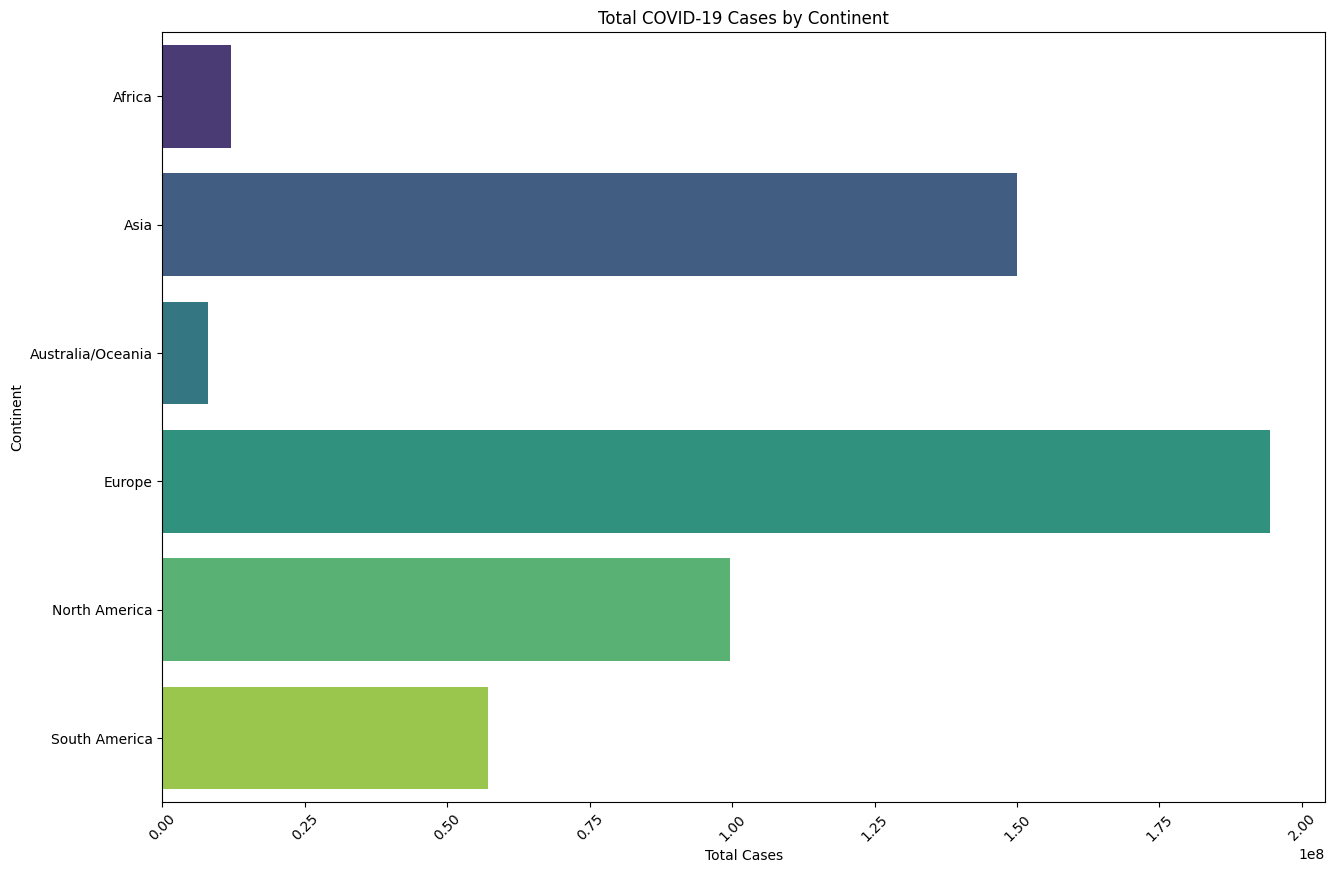

Text(0, 0.5, 'Continent')

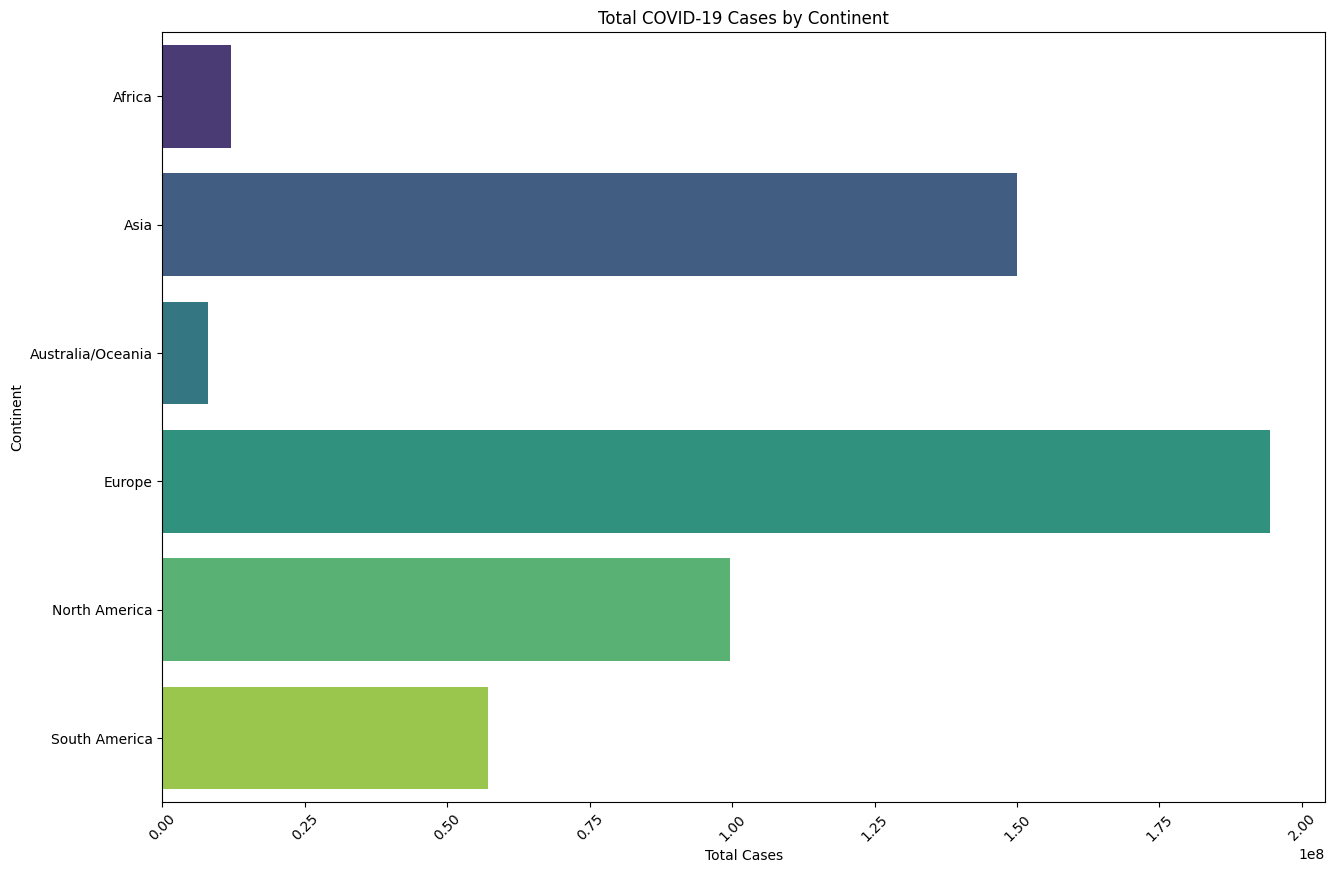

In [41]:
#First Viz: Continental Cases Distribution
plt.figure(figsize=(15, 10))
#plt.subplot(1, 3, 3)
sns.barplot(data=continental_summary.reset_index(),
            x='TotalConfirmed', y='Continent',
            palette='viridis')
plt.title('Total COVID-19 Cases by Continent')
plt.xticks(rotation=45)
plt.xlabel('Total Cases')
plt.ylabel('Continent')

Text(0, 0.5, 'Mortality Rate (%)')

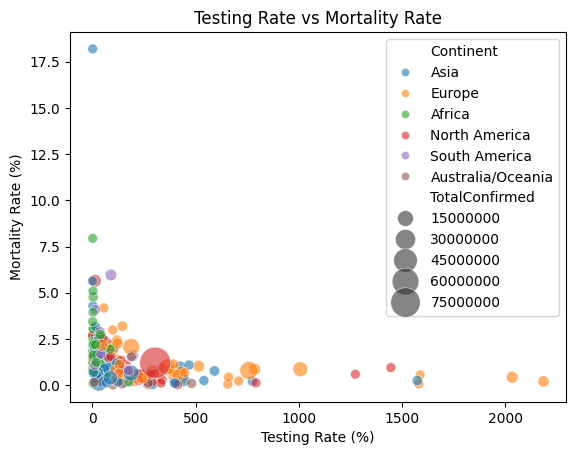

Text(0, 0.5, 'Mortality Rate (%)')

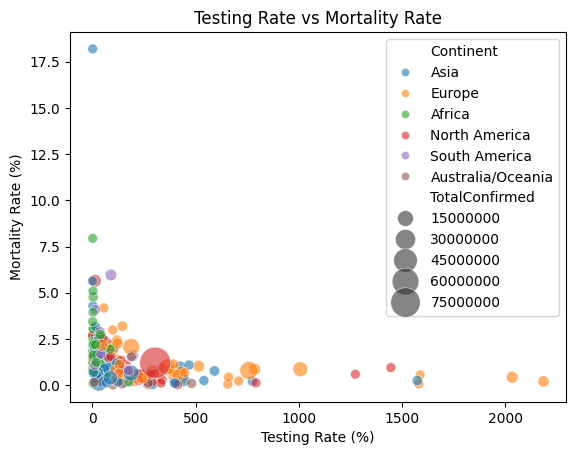

In [42]:
#Second Viz: Testing Rate vs Mortality Rate
# plt.subplot(1, 3, 2)
sns.scatterplot(data=final_df,
                x='TestingRate', y='MortalityRate',
                hue='Continent', size='TotalConfirmed',
                sizes=(50, 500), alpha=0.6)
plt.title('Testing Rate vs Mortality Rate')
plt.xlabel('Testing Rate (%)')
plt.ylabel('Mortality Rate (%)')

<ipython-input-18-ff156cad0b60>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_mortality,


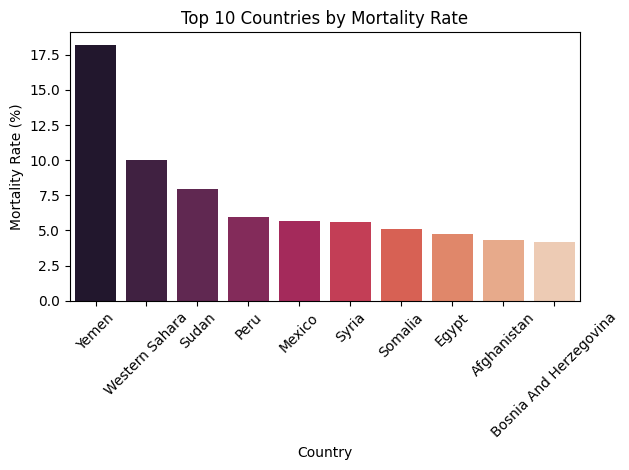

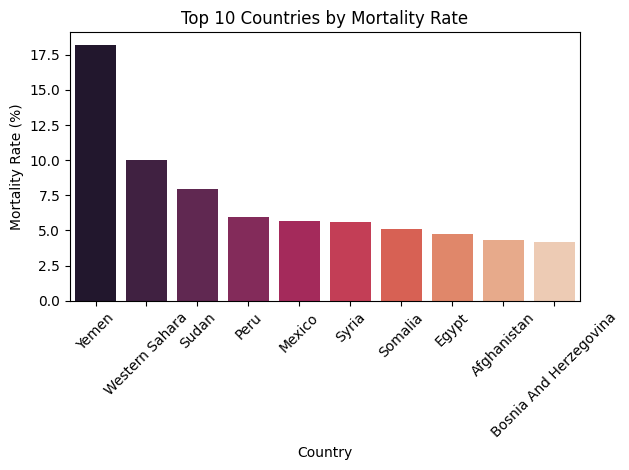

In [43]:
#Third Viz: Top 10 Countries by Mortality Rate
#plt.subplot(1, 3, 3)
sns.barplot(data=top_mortality,
            x='Country', y='MortalityRate',
            palette='rocket')
plt.title('Top 10 Countries by Mortality Rate')
plt.xticks(rotation=45)
plt.ylabel('Mortality Rate (%)')

plt.tight_layout()
plt.show()

#**ML Model**

 **Randomforest Classifier**

RandomForestRegressor implementation is developed for predicting continuously valued mortality rates. It starts with the division of the data into training set (80%) and test set (20%) and then it rescales the feature using StandardScaler. Of which, the model is trained using 100 decision trees (n_estimators=100) and with the use of bootstrap aggregating to turn decision trees from different random subset of the data. It means that during the construction of each tree, it predicts based on other different features subsets and at the end, an average of all the tree is used. Accuracy is addressed using Mean Squared Error, MSE while the extent to which the model addresses the issue of variance in mortality rates is addressed using the R² score. Precisely, feature importance is derived in order to establish which factors explain the mortality rate predictions best.

**Randomforest Regressor**

The RandomForestClassifier implementation splits the countries into risk levels (Low, Medium, High, Very High) with respect to mortality rates. It is similar to the regressor as it follows 80-20 of train-test split and StandardScaler for data scaling. It also employs 100 decision trees but rather than take an average of the predictive values from each tree, each tree takes a “vote” on a risk category and the most voted category is taken as the final voting category. The classifier embarks on a natural internal encoding mechanism to deal with the multi-class scenario of risk levels on its own. Model accuracy is assessed through their classification report particularly for the precision, recall, and F1-score for the distinct risk levels, while, a confusion matrix helps to underscores correct and incorrect predictions between actual and the expected risk level. This implementation allows to determine the countries with a high level of risk and analyze the patterns that result in different risk levels.



In [44]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [45]:
def prepare_data(df):
    """
    Prepare data for modeling by handling missing values and encoding categorical variables
    """
    # Select features for modeling
    features = ['TotalConfirmed', 'TotalDeaths', 'TotalRecovered', 'ActiveCases',
                'TestingRate', 'CasesPer1M', 'DeathsPer1M', 'TestsPer1M']

    # Create copy of relevant columns
    model_df = df[features].copy()

    # Handle missing values
    model_df = model_df.fillna(model_df.mean())

    return model_df

In [46]:
def create_target_variables(df):
    """
    Create target variables for regression and classification
    """

    # Handle missing values by filling with the mean:
    df['MortalityRate'] = df['MortalityRate'].fillna(df['MortalityRate'].mean())

    y_reg = df['MortalityRate']

    # Classification target: Risk Level based on mortality rate
    risk_bins = [0, 1, 2.5, 5, float('inf')]
    risk_labels = ['Low', 'Medium', 'High', 'Very High']
    y_clf = pd.cut(df['MortalityRate'], bins=risk_bins, labels=risk_labels)

    # Encode classification labels
    le = LabelEncoder()
    y_clf = le.fit_transform(y_clf)


    return y_reg, y_clf

In [47]:
def train_regression_model(X, y):
    """
    Train and evaluate regression model for mortality rate prediction
    """
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train model
    reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
    reg_model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = reg_model.predict(X_test_scaled)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = reg_model.score(X_test_scaled, y_test)

    # Feature importance
    feature_imp = pd.Series(reg_model.feature_importances_,
                           index=X.columns).sort_values(ascending=False)

    return reg_model, mse, r2, feature_imp, y_test, y_pred

In [48]:
def train_classification_model(X, y):
    """
    Train and evaluate classification model for risk level prediction
    """
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train model
    clf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    clf_model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = clf_model.predict(X_test_scaled)

    # Calculate metrics
    clf_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    return clf_model, clf_report, conf_matrix, y_test, y_pred

In [49]:
def plot_results(reg_feature_imp, y_test_reg, y_pred_reg, conf_matrix):
    """
    Plot model results
    """
    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    # Plot feature importance
    reg_feature_imp.plot(kind='bar', ax=axes[0])
    axes[0].set_title('Feature Importance for Mortality Rate Prediction')
    axes[0].set_xlabel('Features')
    axes[0].set_ylabel('Importance')
    axes[0].tick_params(axis='x', rotation=45)

    # Plot predicted vs actual values
    axes[1].scatter(y_test_reg, y_pred_reg, alpha=0.5)
    axes[1].plot([y_test_reg.min(), y_test_reg.max()],
                 [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
    axes[1].set_title('Predicted vs Actual Mortality Rates')
    axes[1].set_xlabel('Actual Mortality Rate')
    axes[1].set_ylabel('Predicted Mortality Rate')

    # Plot confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', ax=axes[2])
    axes[2].set_title('Confusion Matrix for Risk Level Classification')
    axes[2].set_xlabel('Predicted Risk Level')
    axes[2].set_ylabel('Actual Risk Level')

    plt.tight_layout()
    plt.show()


Regression Results:
Mean Squared Error: 5.6295
R² Score: 0.1879

Classification Results:
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.90      0.72      0.80        25
           2       0.54      0.81      0.65        16
           3       0.00      0.00      0.00         1

    accuracy                           0.70        46
   macro avg       0.49      0.45      0.45        46
weighted avg       0.72      0.70      0.69        46



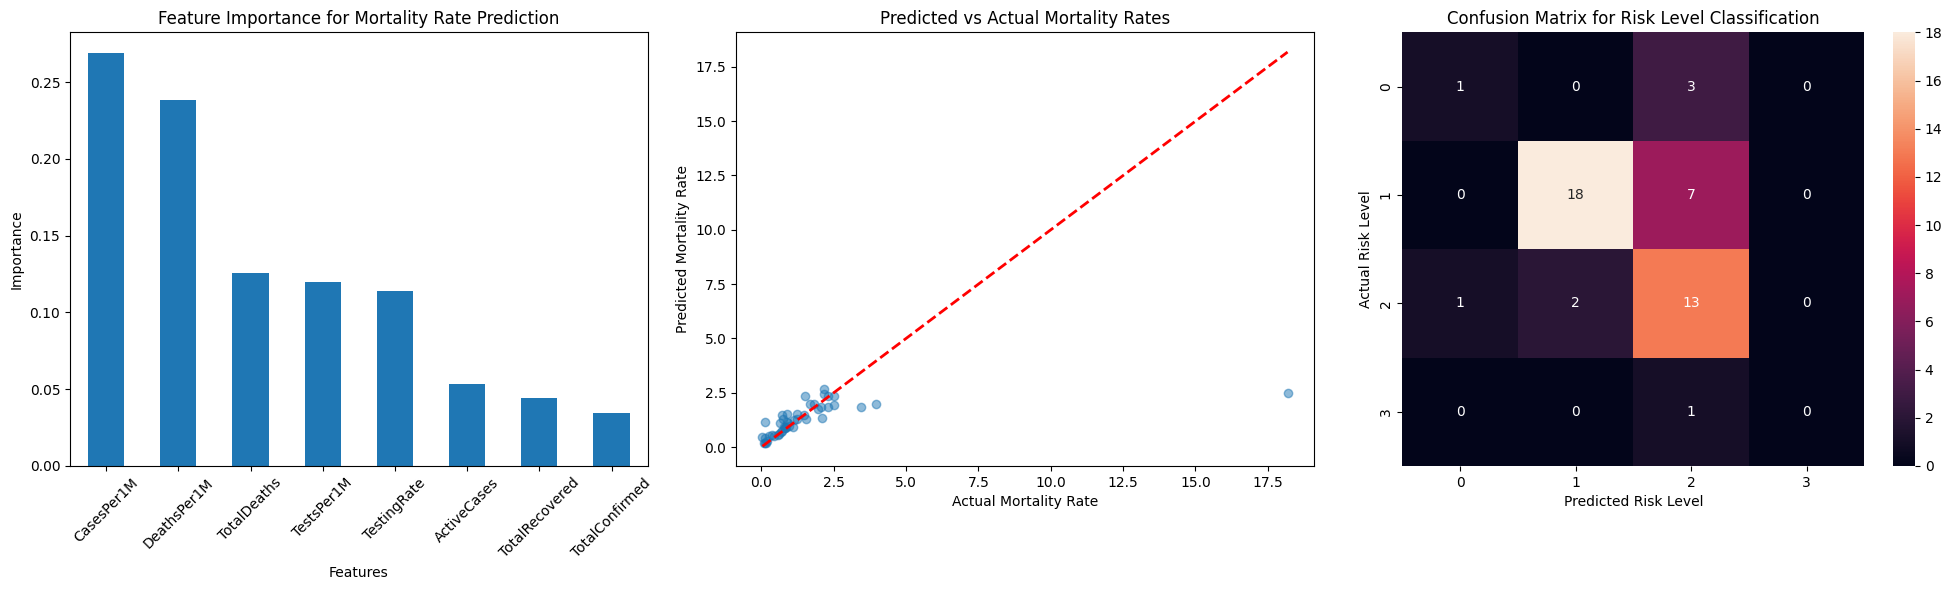


Regression Results:
Mean Squared Error: 5.6295
R² Score: 0.1879

Classification Results:
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.90      0.72      0.80        25
           2       0.54      0.81      0.65        16
           3       0.00      0.00      0.00         1

    accuracy                           0.70        46
   macro avg       0.49      0.45      0.45        46
weighted avg       0.72      0.70      0.69        46



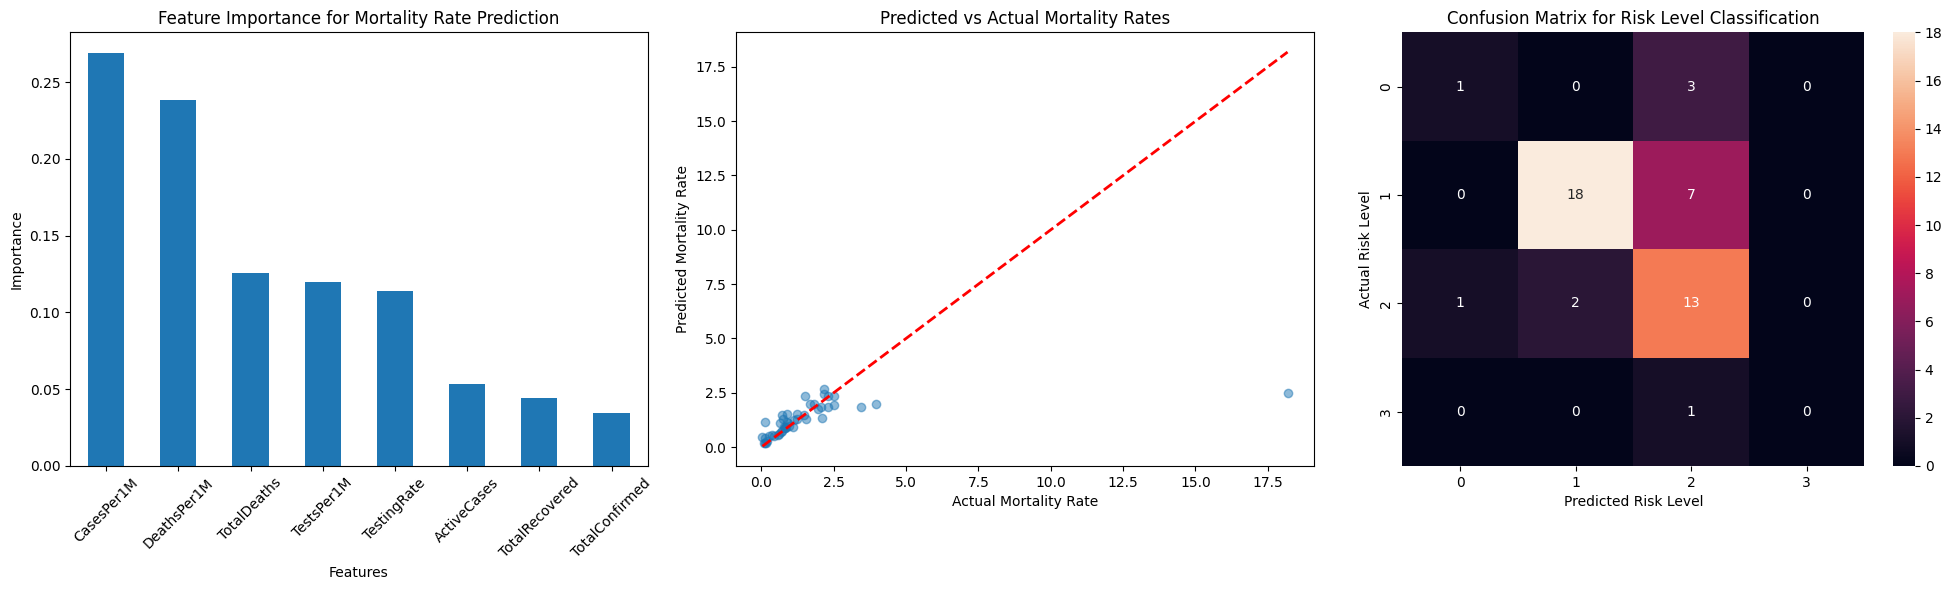

In [50]:
def main(df):
    """
    Main function to run all modeling steps
    """
    # Prepare data
    model_df = prepare_data(df)
    y_reg, y_clf = create_target_variables(df)

    # Train models
    reg_results = train_regression_model(model_df, y_reg)
    clf_results = train_classification_model(model_df, y_clf)

    # Print results
    print("\nRegression Results:")
    print(f"Mean Squared Error: {reg_results[1]:.4f}")
    print(f"R² Score: {reg_results[2]:.4f}")

    print("\nClassification Results:")
    print(clf_results[1])

    # Plot results
    plot_results(reg_results[3], reg_results[4], reg_results[5], clf_results[2])

# DriverCode
main(final_df)

#**Conclusion**

This analysis project helped to understand the trends of COVID-19 in the whole world, effect of the continuity and size of the population in the different continents. By data preprocessing, analysis, and graphing, we identified the following distinct patterns of impact and response by different geographical areas. Looking at cases on the continents level it has been established that Europe and Asia had the highest incidence while at the mortality rate analysis it was noticeable that countries like Yemen and Western Sahara had the highest death rates. Comparing testing rates with the mortality rates, it became clear that countries that had better rates of testing the population tended to have their fatalities under control better, miraculously pointing at the need for better testing strategies during a pandemic.

Comparing the mortality rates and risk levels in the next phase, the advantages of the broader application of predictive modeling, such as the regression and classification methodologies, were discovered. The Random Forest models were useful in identifying which variables contributed to COVID-19 outcomes the most, with testing rates and healthcare capacity indicators as high importance predictors. This project epitomises the role of data science in appraising global health emergencies and may provide useful precedence for healthcare governance constituencies in anticipating and handling future epidemics. Thus, the methodologies employed in this paper, such as the risk classification system and mortality rate forecasts, might be useful for other application areas of public health, not only providing a historical perspective and the results of a study but also lending themselves to future projections.